#### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import svm,metrics
# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error,accuracy_score ,median_absolute_error

# Distributions
import scipy

### Importing Data

In [3]:
student_1 = pd.read_csv('student-mat.csv',delimiter=";")
# student_1

In [4]:
student_2 = pd.read_csv('student-por.csv',delimiter=";")
# student_2

In [5]:
student_1.info()
student_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

## Merging data

In [6]:
student_1['Subject'] = "Maths"
student_2['Subject'] = "Portuguese"
student = pd.concat([student_1, student_2], axis=0)
print(student.shape)

(1044, 34)


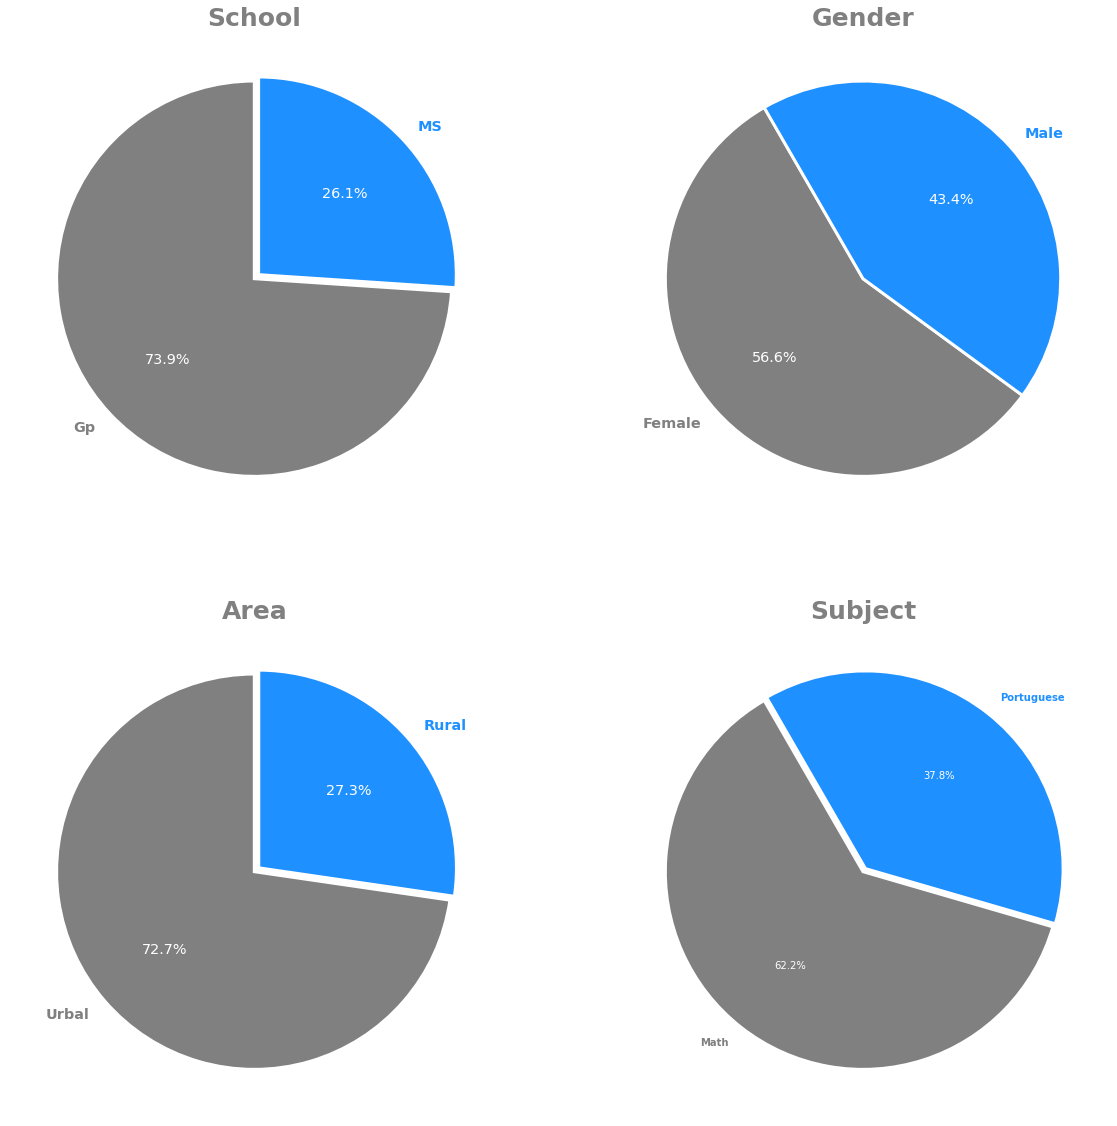

In [7]:
temp_school=student.school.value_counts()
# print(temp_school.value())
fig, ax = plt.subplots(2,2,figsize=(20,20))
patches, texts, pcts = ax[0,0].pie(temp_school,labels=["Gp","MS"],startangle=90,autopct='%.1f%%',wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},textprops={'size': 'x-large'},colors=['grey','dodgerblue'],explode=(0,0.03))
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
ax[0,0].set_title('School', fontsize=25,color="grey",fontweight=600)

temp_gender=student.sex.value_counts()
patches, texts, pcts = ax[0,1].pie(student.sex.value_counts(), labels=["Female","Male"],autopct='%.1f%%',wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},startangle=120,textprops={'size': 'x-large'},colors=['grey','dodgerblue'])
plt.setp(pcts, color='white')
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(texts, fontweight=600)

ax[0,1].set_title('Gender', fontsize=25,color="grey",fontweight=600)

# temp_gender=student.sex.value_counts()
patches, texts, pcts = ax[1,0].pie(student.address.value_counts(), labels=["Urbal","Rural"],autopct='%.1f%%',wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},startangle=90,textprops={'size': 'x-large'},colors=['grey','dodgerblue'],explode=(0,0.03))
plt.setp(pcts, color='white')
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(texts, fontweight=600)
ax[1,0].set_title('Area', fontsize=25,color="grey",fontweight=600)

patches, texts, pcts = ax[1,1].pie(student.Subject.value_counts(), labels=["Math","Portuguese"],autopct='%.1f%%',wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},startangle=120,colors=['grey','dodgerblue'],explode=(0,0.02))
plt.setp(pcts, color='white')
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(texts, fontweight=600)
ax[1,1].set_title('Subject', fontsize=25,color="grey",fontweight=600)
plt.savefig('Pie_chart.png',dpi=300)

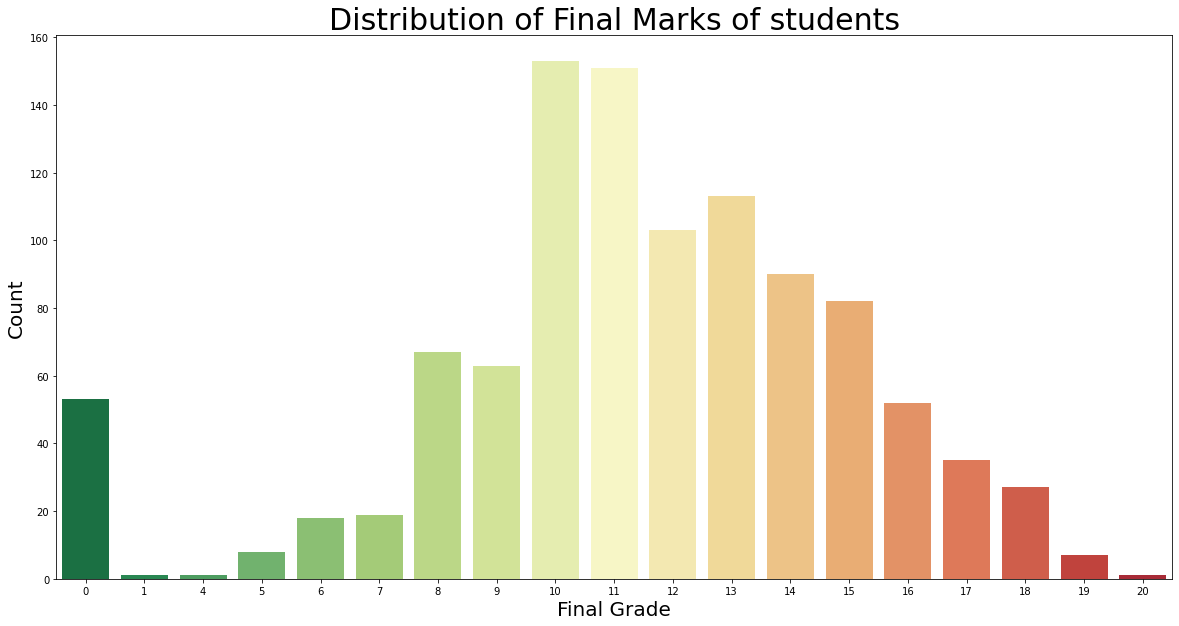

In [8]:
fig, ax = plt.subplots(figsize=(20, 10))
# sns.set_palette("pastel")
chart = sns.countplot(x=student['G3'],palette='RdYlGn_r')
chart.axes.set_title('Distribution of Final Marks of students', fontsize = 30)
chart.set_xlabel('Final Grade', fontsize = 20)
chart.set_ylabel('Count', fontsize = 20)
# plt.savefig('Distribution of Final Marks of students.png',dpi=500)
plt.show()


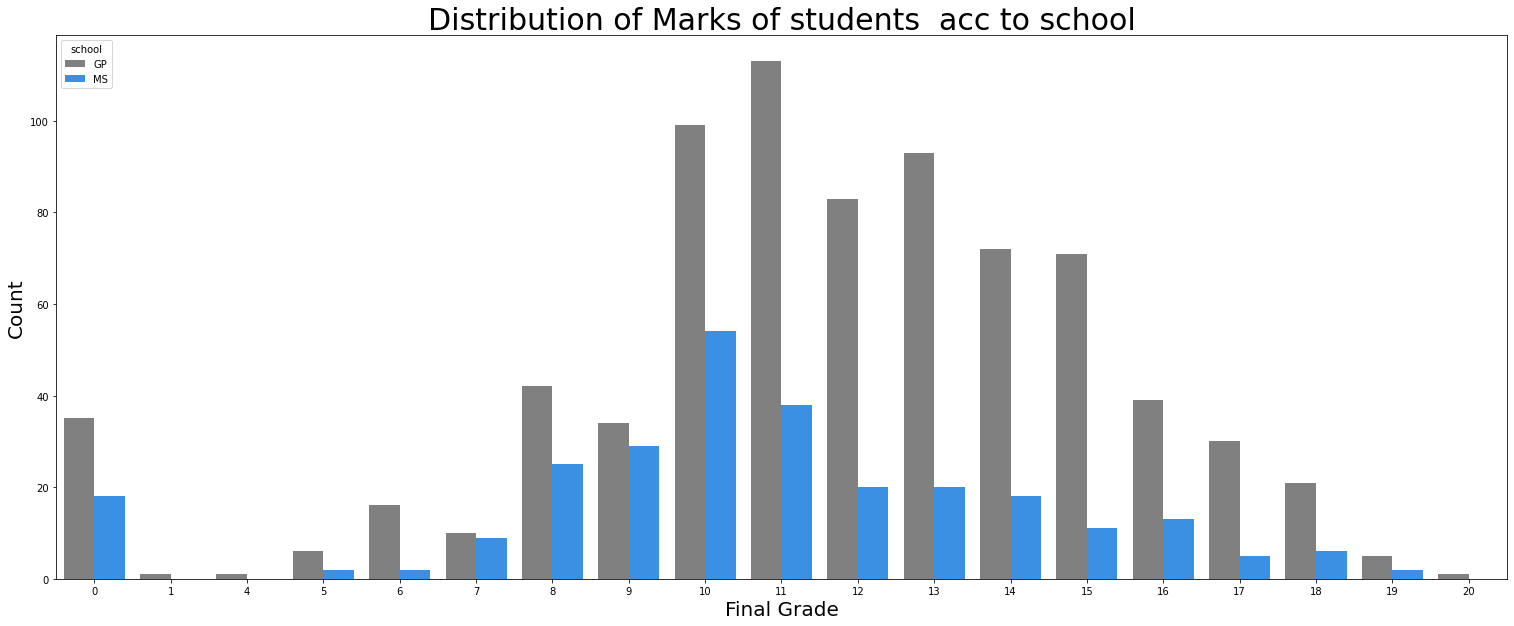

In [9]:
fig, ax = plt.subplots(figsize=(26, 10))
chart = sns.countplot(x=student['G3'],hue = student['school'],palette=("grey","dodgerblue"))
chart.axes.set_title('Distribution of Marks of students  acc to school', fontsize = 30)
chart.set_xlabel('Final Grade', fontsize = 20)
chart.set_ylabel('Count', fontsize = 20)
# plt.savefig('Distribution of Marks of students  acc to school.png',dpi=500)
plt.show()

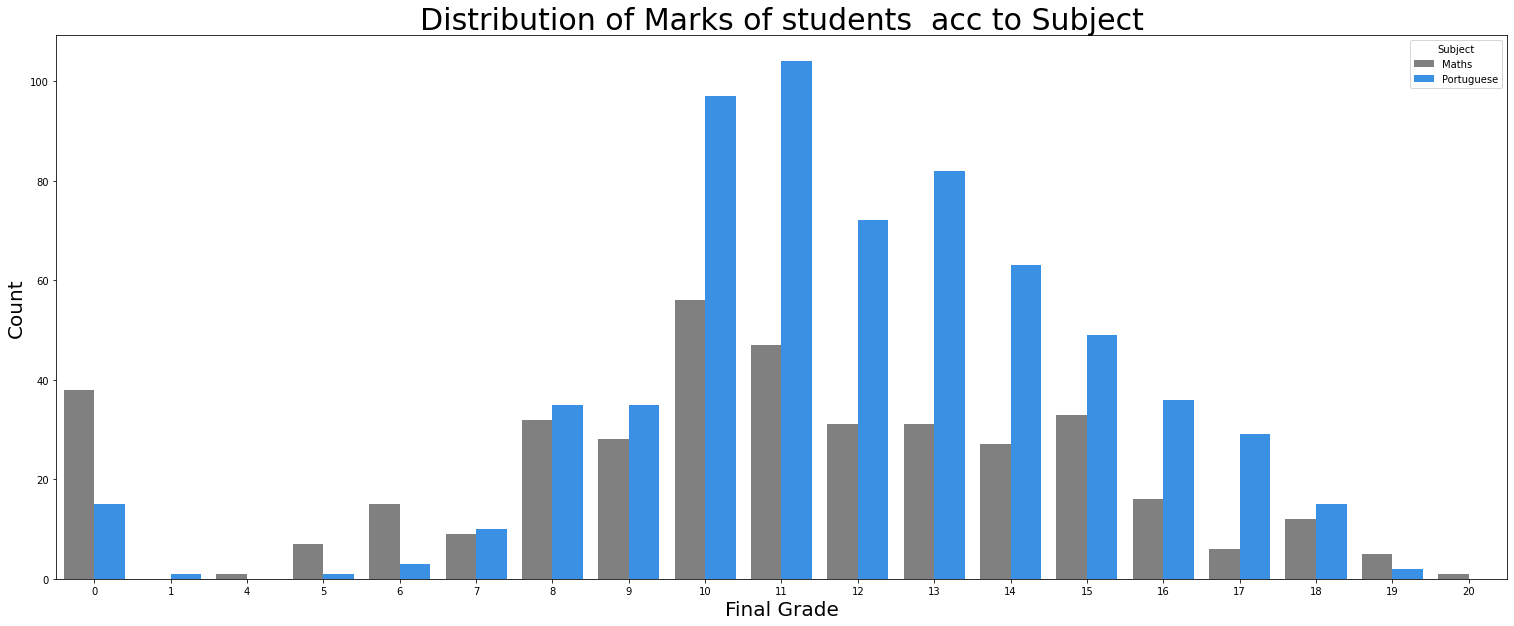

In [10]:
fig, ax = plt.subplots(figsize=(26, 10))
chart = sns.countplot(x=student['G3'],hue = student['Subject'],palette=("grey","dodgerblue"))
chart.axes.set_title('Distribution of Marks of students  acc to Subject', fontsize = 30)
chart.set_xlabel('Final Grade', fontsize = 20)
chart.set_ylabel('Count', fontsize = 20)
plt.savefig('Distribution acc Marks.png',dpi=500)
plt.show()

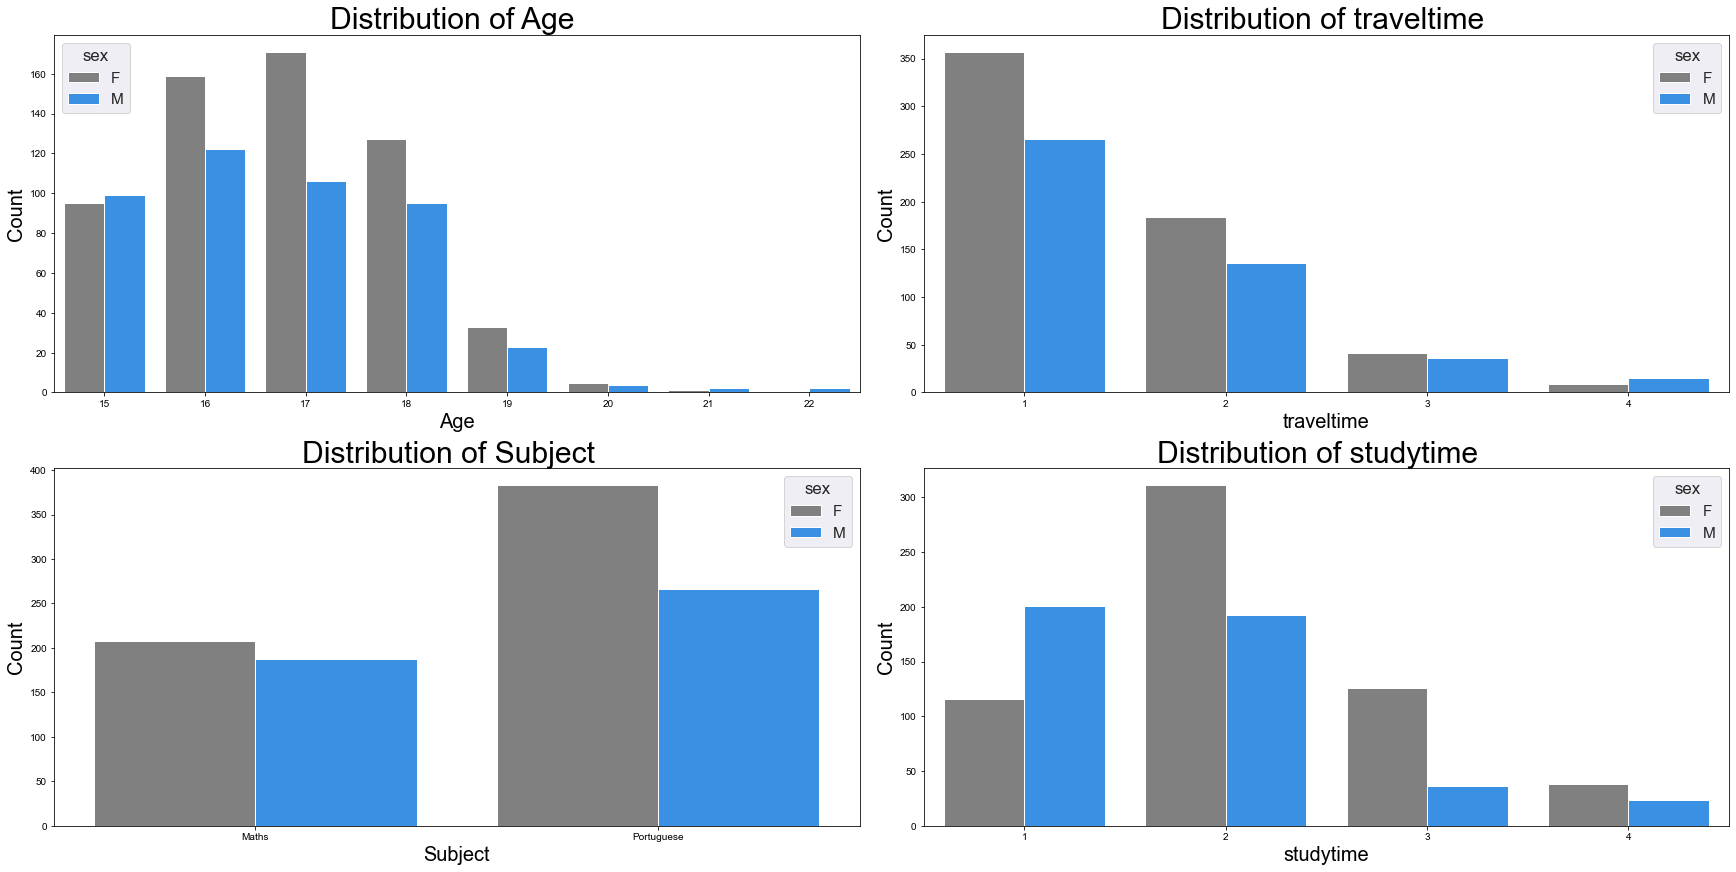

In [11]:
fig, axs = plt.subplots(2,2,figsize=(24, 12), constrained_layout=True)
sns.set(font_scale = 1.4)
chart = sns.countplot(x=student.age,hue = student['sex'],palette=("grey","dodgerblue"),ax=axs[0,0])
chart.axes.set_title('Distribution of Age ', fontsize = 30)
chart.set_xlabel('Age', fontsize = 20)
chart.set_ylabel('Count', fontsize = 20)

chart1 = sns.countplot(x=student['traveltime'],hue = student['sex'],palette=("grey","dodgerblue"),ax=axs[0,1])
chart1.axes.set_title('Distribution of traveltime ', fontsize = 30)
chart1.set_xlabel('traveltime', fontsize = 20)
chart1.set_ylabel('Count', fontsize = 20)

chart2 = sns.countplot(x=student['Subject'],hue = student['sex'],palette=("grey","dodgerblue"),ax=axs[1,0])
chart2.axes.set_title('Distribution of Subject  ', fontsize = 30)
chart2.set_xlabel('Subject', fontsize = 20)
chart2.set_ylabel('Count', fontsize = 20)

chart3 = sns.countplot(x=student['studytime'],hue = student['sex'],palette=("grey","dodgerblue"),ax=axs[1,1])
chart3.axes.set_title('Distribution of studytime  ', fontsize = 30)
chart3.set_xlabel('studytime', fontsize = 20)
chart3.set_ylabel('Count', fontsize = 20)
# plt.savefig('Distribution acc Gender.png',dpi=500)
plt.show()

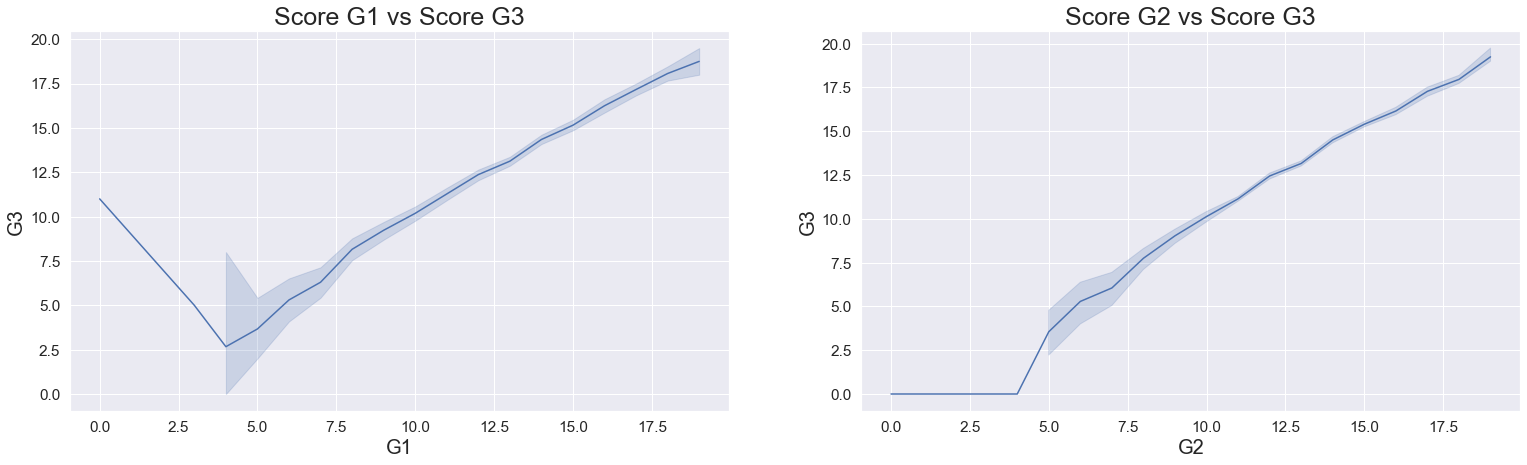

In [12]:
sns.set(font_scale = 1.4)
fg, axs = plt.subplots(1,2, figsize=(26,7))
b1 = sns.lineplot(x='G1', y='G3', data=student, ax=axs[0])
axs[0].set_title('Score G1 vs Score G3',fontsize=25)
b1.set_xlabel('G1', fontsize = 20)
b1.set_ylabel('G3', fontsize = 20)

b2 = sns.lineplot(x='G2', y='G3', data=student, ax=axs[1])
axs[1].set_title('Score G2 vs Score G3',fontsize=25)
b2.set_xlabel('G2', fontsize = 20)
b2.set_ylabel('G3', fontsize = 20)
# plt.savefig('relation with G1 & G3.png',dpi=500)
plt.show()

## Feature Selection

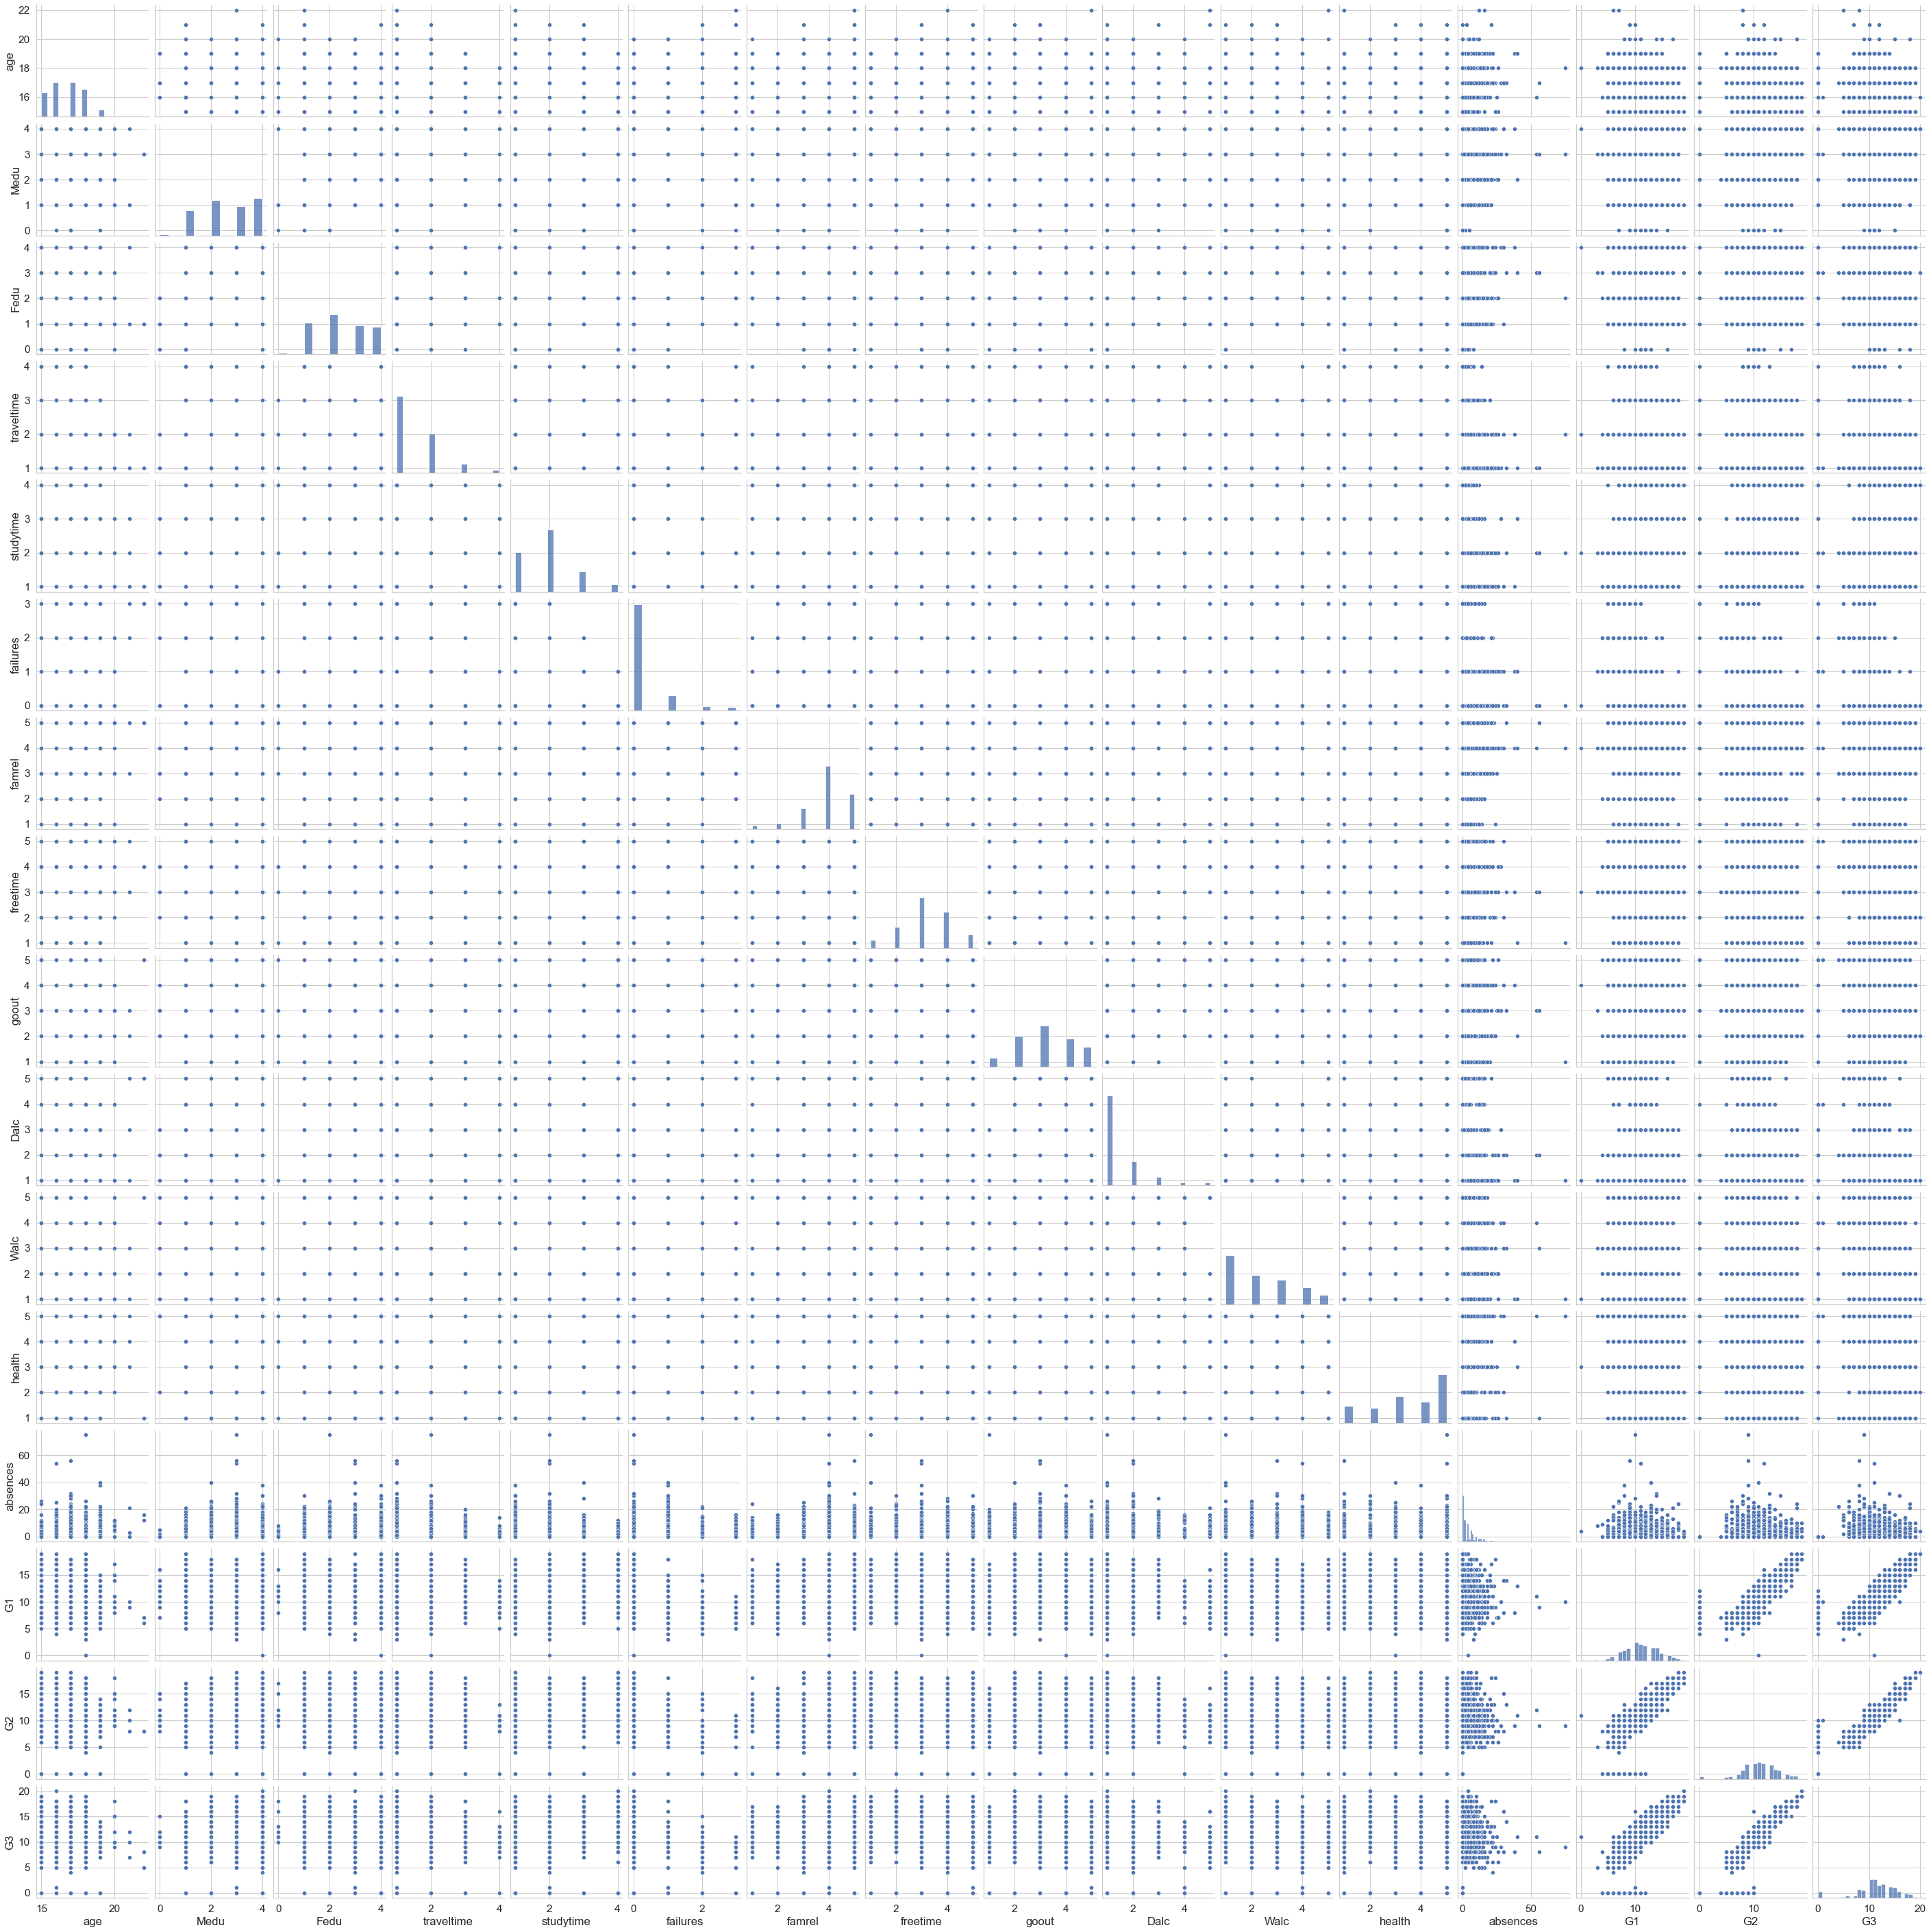

In [13]:
sns.set_style('whitegrid')
sns.pairplot(student)
# plt.savefig('Pair_1.png',dpi=300)
plt.show()

In [14]:
student.corr()['G3'].sort_values()

failures     -0.383145
Dalc         -0.129642
age          -0.125282
Walc         -0.115740
traveltime   -0.102627
goout        -0.097877
health       -0.080079
freetime     -0.064890
absences     -0.045671
famrel        0.054461
Fedu          0.159796
studytime     0.161629
Medu          0.201472
G1            0.809142
G2            0.910743
G3            1.000000
Name: G3, dtype: float64

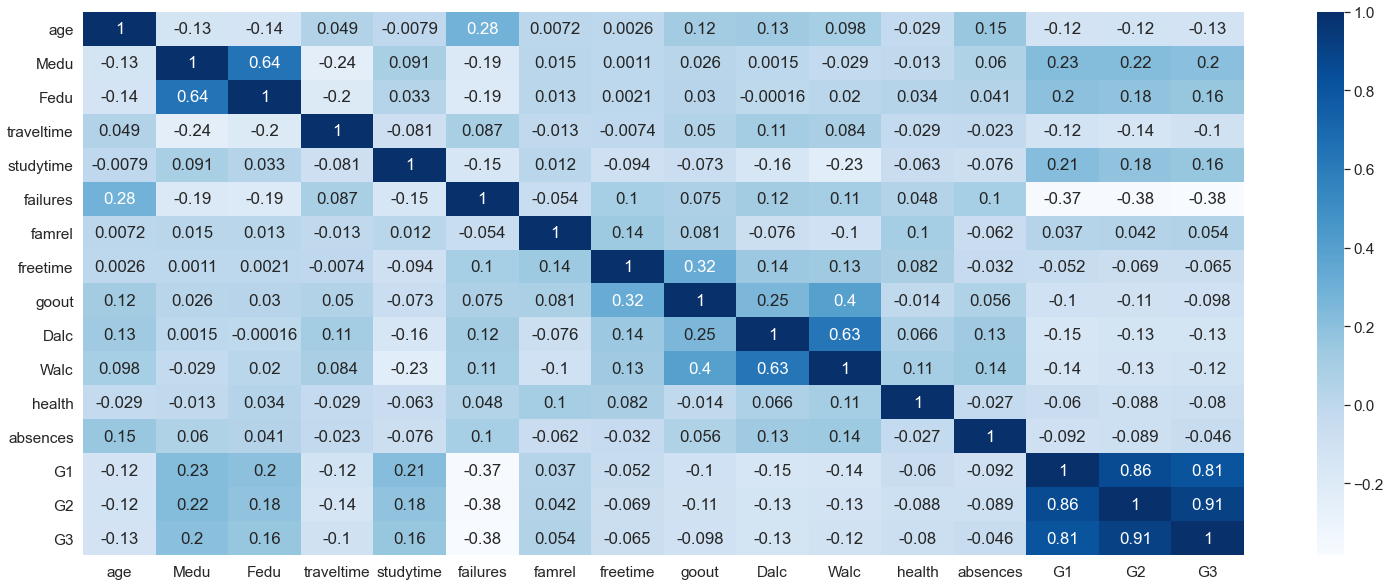

In [15]:
fig, ax = plt.subplots(figsize=(26, 10))
mat = student.corr()
ax = sns.heatmap(student.corr(), cmap='Blues',annot = True)
plt.savefig('Corr.png',dpi=500)
plt.savefig('heat_map_1.png',dpi=300)
plt.show()

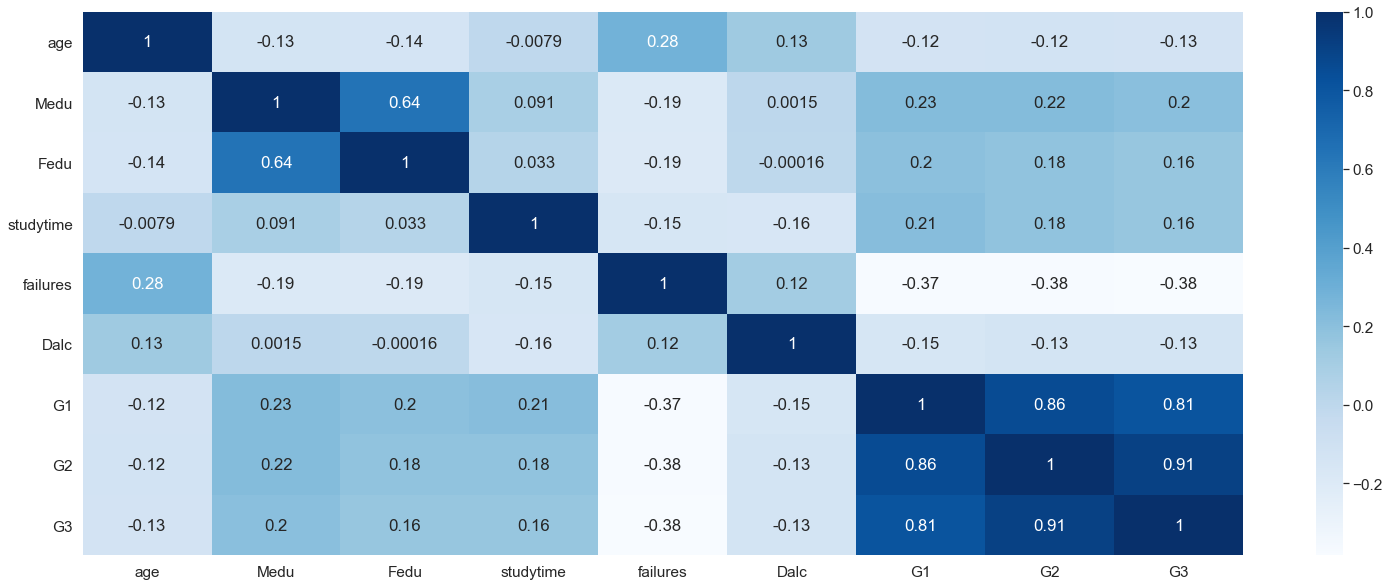

In [16]:
fig, ax = plt.subplots(figsize=(26, 10))
mat = student.corr()
top_corr_features = mat.index[abs(mat["G3"])>0.12]
ax = sns.heatmap(student[top_corr_features].corr(), cmap='Blues', annot = True)
# plt.savefig('Corr_heat_map_2.png',dpi=300)
plt.show()

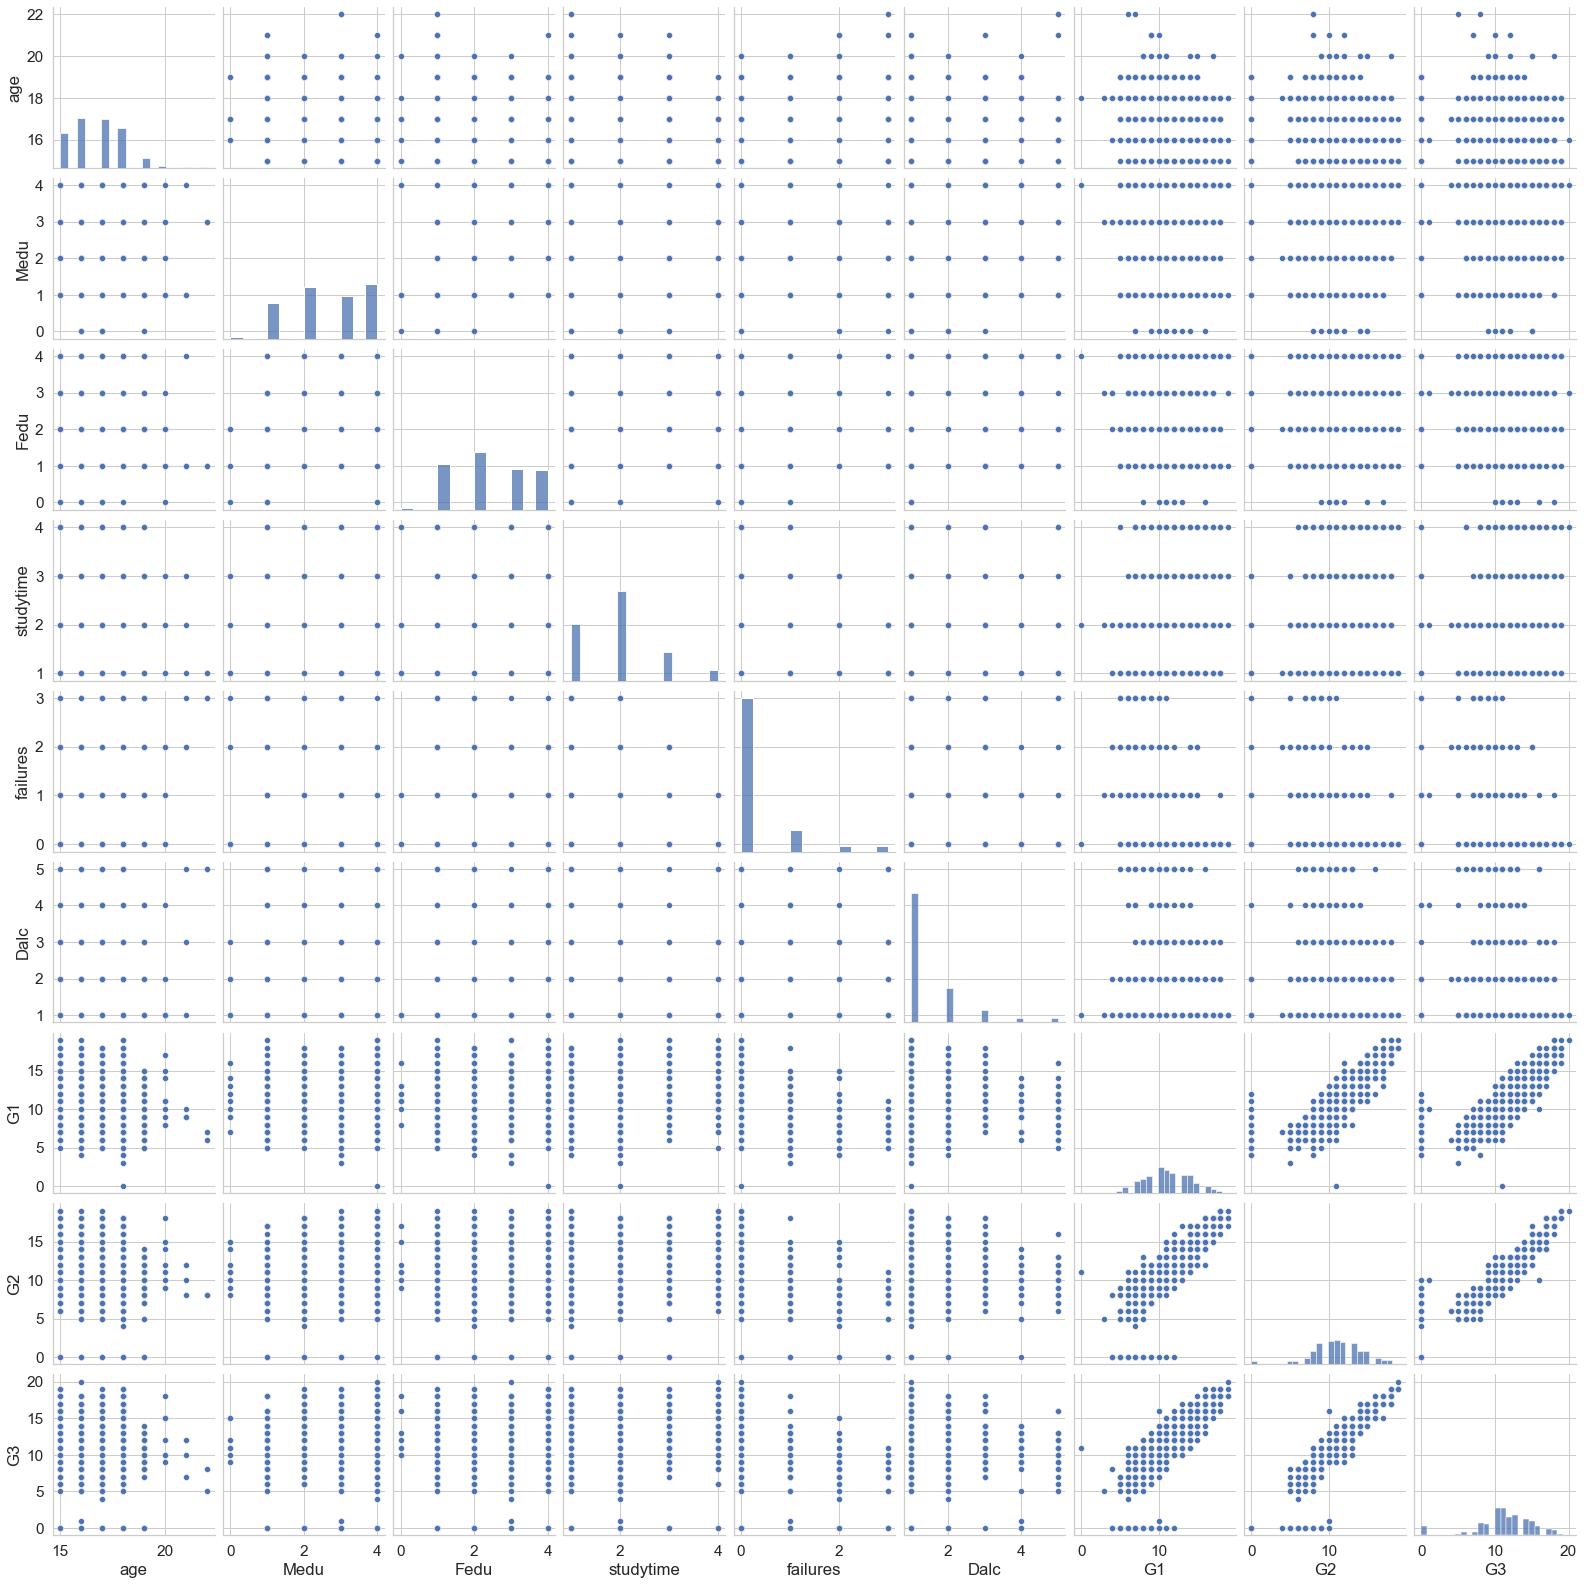

In [17]:
sns.set_style('whitegrid')
sns.pairplot(student[top_corr_features])
# plt.savefig('Corr_pair.png',dpi=300)
plt.show()

In [18]:
student[top_corr_features]

,age,Medu,Fedu,studytime,failures,Dalc,G1,G2,G3
0,18,4,4,2,0,1,5,6,6
1,17,1,1,2,0,1,5,5,6
2,15,1,1,2,3,2,7,8,10
3,15,4,2,3,0,1,15,14,15
4,16,3,3,2,0,1,6,10,10
...,...,...,...,...,...,...,...,...,...
644,19,2,3,3,1,1,10,11,10
645,18,3,1,2,0,1,15,15,16
646,18,1,1,2,0,1,11,12,9
647,17,3,1,1,0,3,10,10,10


# Model 

## linear Regression

### Total Three Regrssion
#### With All Features
#### With Most Co-Related Features

In [24]:
def Liner_regression(x):
    model=LinearRegression()
    if x=="All":
        temp_final=student
        le = preprocessing.LabelEncoder()
        for key in student:
            if student[key].dtypes=="object":
                temp_final[key] = le.fit_transform(student[key])
        X=temp_final.drop("G3",axis=1)
        Y=temp_final['G3']
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3,random_state=29)
        # X_train
        print("Regression With All features\n")
        print("Student:",temp_final.shape,"\nX_train:",X_train.shape, "\nX_test:",X_test.shape, "\ny_train:",y_train.shape , '\ny_test:',y_test.shape )   
        model = LinearRegression()
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        print("MAE(Mean absolute error): ", mean_absolute_error(y_true=y_test,y_pred=pred))  #Mean absolute error
        print("MSE(Mean squared error): ", mean_squared_error(y_true=y_test,y_pred=pred))   #Mean squared error
        r2_score = model.score(X_test,y_test)
        print("Regression score",r2_score*100,'%')
    else:
        columns=['age', 'Medu', 'Fedu', 'studytime', 'failures', 'Dalc',"G1","G2",'G3']
#         columns=['age', 'Medu', 'Fedu', 'studytime', 'failures', 'Dalc','G3']

        df_corr=student[columns]
        X=df_corr.drop("G3",axis=1)
        Y=df_corr['G3']
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=29)
        print("Regression With Most Corelated Related features\n")
        print("Student:",df_corr.shape,"\nX_train:",X_train.shape, "\nX_test:",X_test.shape, "\ny_train:",y_train.shape , '\ny_test:',y_test.shape )   
        model = LinearRegression()
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        print("MAE(Mean absolute error): ", mean_absolute_error(y_true=y_test,y_pred=pred))  #Mean absolute error
        print("MSE(Mean squared error): ", mean_squared_error(y_true=y_test,y_pred=pred))   #Mean squared error
        r2_score = model.score(X_test,y_test)
        print("Regression score",r2_score*100,'%')

#### With All Features 

In [25]:
Liner_regression('All')

Regression With All features

Student: (1044, 34) 
X_train: (730, 33) 
X_test: (314, 33) 
y_train: (730,) 
y_test: (314,)
MAE(Mean absolute error):  0.8291528823712832
MSE(Mean squared error):  1.5014026405285474
Regression score 89.03055770071718 %


#### With Most Co-related Features

In [26]:
Liner_regression(" ")

Regression With Most Corelated Related features

Student: (1044, 9) 
X_train: (730, 8) 
X_test: (314, 8) 
y_train: (730,) 
y_test: (314,)
MAE(Mean absolute error):  0.8005276293902376
MSE(Mean squared error):  1.4997231658972878
Regression score 89.04282816006194 %


### Using Feature selection Technique
#### with Chi2

In [34]:
max1=0
MAE=0
MSE=0
X=student.drop("G3",axis=1)
y=student['G3']
dictory={
    "score":max1,
    "MAE_":MAE,
    "MSE_":MSE,
    "Data":" ",
    "X_train":" ",
    "X_test":" ",
    "y_train":" ",
    "y_test":" ",
    "features":[]
}
for i in range(5,len(X.columns)):
    sel_feat= SelectKBest(chi2, k=i).fit(X,y)
    sel_bool=sel_feat.get_support()
    X_new=X[X.columns[sel_bool]]
    # X_new.head()
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state=29)
    model = LinearRegression()
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    MAE= metrics.mean_absolute_error(y_true=y_test,y_pred=pred)
    MSE= metrics.mean_squared_error(y_true=y_test,y_pred=pred)
    r2_score = (model.score(X_test,y_test))*100
    if r2_score>max1:
        max1=r2_score
        dictory["score"]=max1
        dictory["MAE_"]=MAE
        dictory["MSE_"]=MSE
        dictory["data"]=X_new.shape
        dictory["X_train:"]=X_train.shape 
        dictory["X_test:"]=X_test.shape 
        dictory["y_train:"]=y_train.shape 
        dictory['y_test:']=y_test.shape
        dictory['features']=X.columns[sel_bool]

print("Regression Score", dictory["score"])
print("MAE(Mean absolute error): ", dictory["MAE_"])  #Mean absolute error
print("MSE(Mean squared error): ",  dictory["MSE_"])
print("Student:",dictory["data"])
print("X_train:",dictory["X_train:"])
print("X_test:",dictory["X_test:"])
print("y_train:",dictory["y_train:"])
print('y_test:',dictory['y_test:'])
print("Featurs: ",end="")
for key in dictory['features']:
    print(key,end=" ")

Regression Score 91.6606235401736
MAE(Mean absolute error):  0.6993900156867413
MSE(Mean squared error):  1.0627726866702873
Student: (1044, 12)
X_train: (835, 12)
X_test: (209, 12)
y_train: (835,)
y_test: (209,)
Featurs: school Medu Fedu reason failures schoolsup Dalc Walc absences G1 G2 Subject 

# Logistic Regession

### Using Feature selection Technique
#### with Chi2

In [38]:
student_1 = pd.read_csv('student-mat.csv',delimiter=";")
# student_1
student_2 = pd.read_csv('student-por.csv',delimiter=";")
# student_2
student_1['Subject'] = "Maths"
student_2['Subject'] = "Portuguese"
student = pd.concat([student_1, student_2], axis=0)
# print(student.shape)
data=student
grades = []
data['GAvg'] = (data['G1'] + data['G2'] + data['G3']) / 3
    # For each row in the column,
for row in data['GAvg']:
    # if more than a value,
    if row >= (0.9 * data['GAvg'].max()):
        # Append a letter grade
        grades.append('A')
    # else, if more than a value,
    elif row >= (0.7 * data['GAvg'].max()):
        # Append a letter grade
        grades.append('B')
    # else, if more than a value,
    elif row > (0.4 * data['GAvg'].max()):
        # Append a letter grade
        grades.append('C')
    elif row < (0.4 * data['GAvg'].max()):
        # Append a letter grade
        grades.append('D') 
    # Create a column from the list
data['grades'] = grades
data[['Subject','G1','G2','G3','GAvg',"grades"]]

le = preprocessing.LabelEncoder()
for key in data:
    if data[key].dtypes=="object":
        data[key] = le.fit_transform(data[key])
# data

In [40]:
from sklearn.feature_selection import SelectKBest, chi2
max1=0
MAE=0
MSE=0
X=data.drop("grades",axis=1)
X=X.drop("G3",axis=1)
X=X.drop("GAvg",axis=1)
y=data['grades']
dictory={
    "score":max1,
    "MAE_":MAE,
    "MSE_":MSE,
    "Data":" ",
    "X_train":" ",
    "X_test":" ",
    "y_train":" ",
    "y_test":" ",
    "features":[]
}
for i in range(6,15):
    sel_feat= SelectKBest(chi2, k=i).fit(X,y)
    sel_bool=sel_feat.get_support()
    X_new=X[X.columns[sel_bool]]
    # X_new.head()
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state=29)
    model = LogisticRegression(solver="newton-cg",multi_class='multinomial')
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    MAE= metrics.mean_absolute_error(y_true=y_test,y_pred=pred)
    MSE= metrics.mean_squared_error(y_true=y_test,y_pred=pred)
    r2_score = (model.score(X_test,y_test))*100
    if r2_score>max1:
        max1=r2_score
        dictory["score"]=max1
        dictory["MAE_"]=MAE
        dictory["MSE_"]=MSE
        dictory["data"]=X_new.shape
        dictory["X_train:"]=X_train.shape 
        dictory["X_test:"]=X_test.shape 
        dictory["y_train:"]=y_train.shape 
        dictory['y_test:']=y_test.shape
        dictory['features']=X.columns[sel_bool]

print("Regression Score", dictory["score"])
print("MAE(Mean absolute error): ", dictory["MAE_"])  #Mean absolute error
print("MSE(Mean squared error): ",  dictory["MSE_"])
print("Student:",dictory["data"])
print("X_train:",dictory["X_train:"])
print("X_test:",dictory["X_test:"])
print("y_train:",dictory["y_train:"])
print('y_test:',dictory['y_test:'])
print("Featurs: ",end="")
for key in dictory['features']:
    print(key,end=" ")

Regression Score 97.60765550239235
MAE(Mean absolute error):  0.023923444976076555
MSE(Mean squared error):  0.023923444976076555
Student: (1044, 8)
X_train: (835, 8)
X_test: (209, 8)
y_train: (835,)
y_test: (209,)
Featurs: Medu failures schoolsup Walc absences G1 G2 Subject 

### Predicting with selected features

In [ ]:
X=data[['Medu', 'failures' ,'schoolsup', 'Walc' ,'absences' ,'G1','G2' ,'Subject']]
# X=X.drop("G3",axis=1)
# X=X.drop("GAvg",axis=1)
y=data['grades']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=29)
model = LogisticRegression(solver="newton-cg",multi_class='multinomial')
model.fit(X_train, y_train)
pred = model.predict(X_test)
MAE= metrics.mean_absolute_error(y_true=y_test,y_pred=pred)
MSE= metrics.mean_squared_error(y_true=y_test,y_pred=pred)
r2_score = (model.score(X_test,y_test))*100

In [44]:
print("Regression Score : ",r2_score)
print("MAE(Mean absolute error): ",MAE)  #Mean absolute error
print("MSE(Mean squared error): ",MSE)
print("Confusion Matrix: \n",confusion_matrix(y_test,pred))
matrix = classification_report(y_test,pred)
print('Classification report : \n',matrix)

Regression Score :  95.21531100478468
MAE(Mean absolute error):  0.04784688995215311
MSE(Mean squared error):  0.04784688995215311
Confusion Matrix: 
 [[  7   0   0   0]
 [  1  34   5   0]
 [  0   2 141   2]
 [  0   0   0  17]]
Classification report : 
               precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.94      0.85      0.89        40
           2       0.97      0.97      0.97       145
           3       0.89      1.00      0.94        17

    accuracy                           0.95       209
   macro avg       0.92      0.96      0.94       209
weighted avg       0.95      0.95      0.95       209



## Decision Tree

## Dision tree can only predict catagorical value so first we make new feature grade which can be 
### A- best Performance
### B- Good Performance
### C- Keep Going
### D- Bad Performance

In [46]:
student_1 = pd.read_csv('student-mat.csv',delimiter=";")
student_1
student_2 = pd.read_csv('student-por.csv',delimiter=";")
student_2
student_1['Subject'] = "Maths"
student_2['Subject'] = "Portuguese"
student = pd.concat([student_1, student_2], axis=0)
print(student.shape)

(1044, 34)


In [126]:
data=student
grades = []
data['GAvg'] = (data['G1'] + data['G2'] + data['G3']) / 3
    # For each row in the column,
for row in data['GAvg']:
    # if more than a value,
    if row >= (0.9 * data['GAvg'].max()):
        # Append a letter grade
        grades.append('A')
    # else, if more than a value,
    elif row >= (0.7 * data['GAvg'].max()):
        # Append a letter grade
        grades.append('B')
    # else, if more than a value,
    elif row > (0.4 * data['GAvg'].max()):
        # Append a letter grade
        grades.append('C')
    elif row < (0.4 * data['GAvg'].max()):
        # Append a letter grade
        grades.append('D') 
    # Create a column from the list
data['grades'] = grades
data[['Subject','G1','G2','G3','GAvg',"grades"]]

,Subject,G1,G2,G3,GAvg,grades
0,Maths,5,6,6,5.666667,D
1,Maths,5,5,6,5.333333,D
2,Maths,7,8,10,8.333333,C
3,Maths,15,14,15,14.666667,B
4,Maths,6,10,10,8.666667,C
...,...,...,...,...,...,...
644,Portuguese,10,11,10,10.333333,C
645,Portuguese,15,15,16,15.333333,B
646,Portuguese,11,12,9,10.666667,C
647,Portuguese,10,10,10,10.000000,C


#### Label Encoding

In [47]:
le = preprocessing.LabelEncoder()
for key in data:
    if data[key].dtypes=="object":
        data[key] = le.fit_transform(data[key])
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,Subject,GAvg,grades
0,0,0,18,1,0,0,4,4,0,4,...,1,1,3,6,5,6,6,0,5.666667,3
1,0,0,17,1,0,1,1,1,0,2,...,1,1,3,4,5,5,6,0,5.333333,3
2,0,0,15,1,1,1,1,1,0,2,...,2,3,3,10,7,8,10,0,8.333333,2
3,0,0,15,1,0,1,4,2,1,3,...,1,1,5,2,15,14,15,0,14.666667,1
4,0,0,16,1,0,1,3,3,2,2,...,1,2,5,4,6,10,10,0,8.666667,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,0,0,1,2,3,3,2,...,1,2,5,4,10,11,10,1,10.333333,2
645,1,0,18,1,1,1,3,1,4,3,...,1,1,1,4,15,15,16,1,15.333333,1
646,1,0,18,1,0,1,1,1,2,2,...,1,1,5,6,11,12,9,1,10.666667,2
647,1,1,17,1,1,1,3,1,3,3,...,3,4,2,6,10,10,10,1,10.000000,2


# With All features

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'Subject']
Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'Subject'],
      dtype='object')
Student: (1044, 36) 
X_train: (730, 33) 
X_test: (314, 33) 
y_train: (730, 1) 
y_test: (314, 1)
Accuracy:  89.80891719745223

confusion_matrix: 
 [[  7   1   0   0]
 [  3  65   3   0]
 [  0   7 180   8]
 [  0   0  10  30]]
Classification report : 
               precision    r

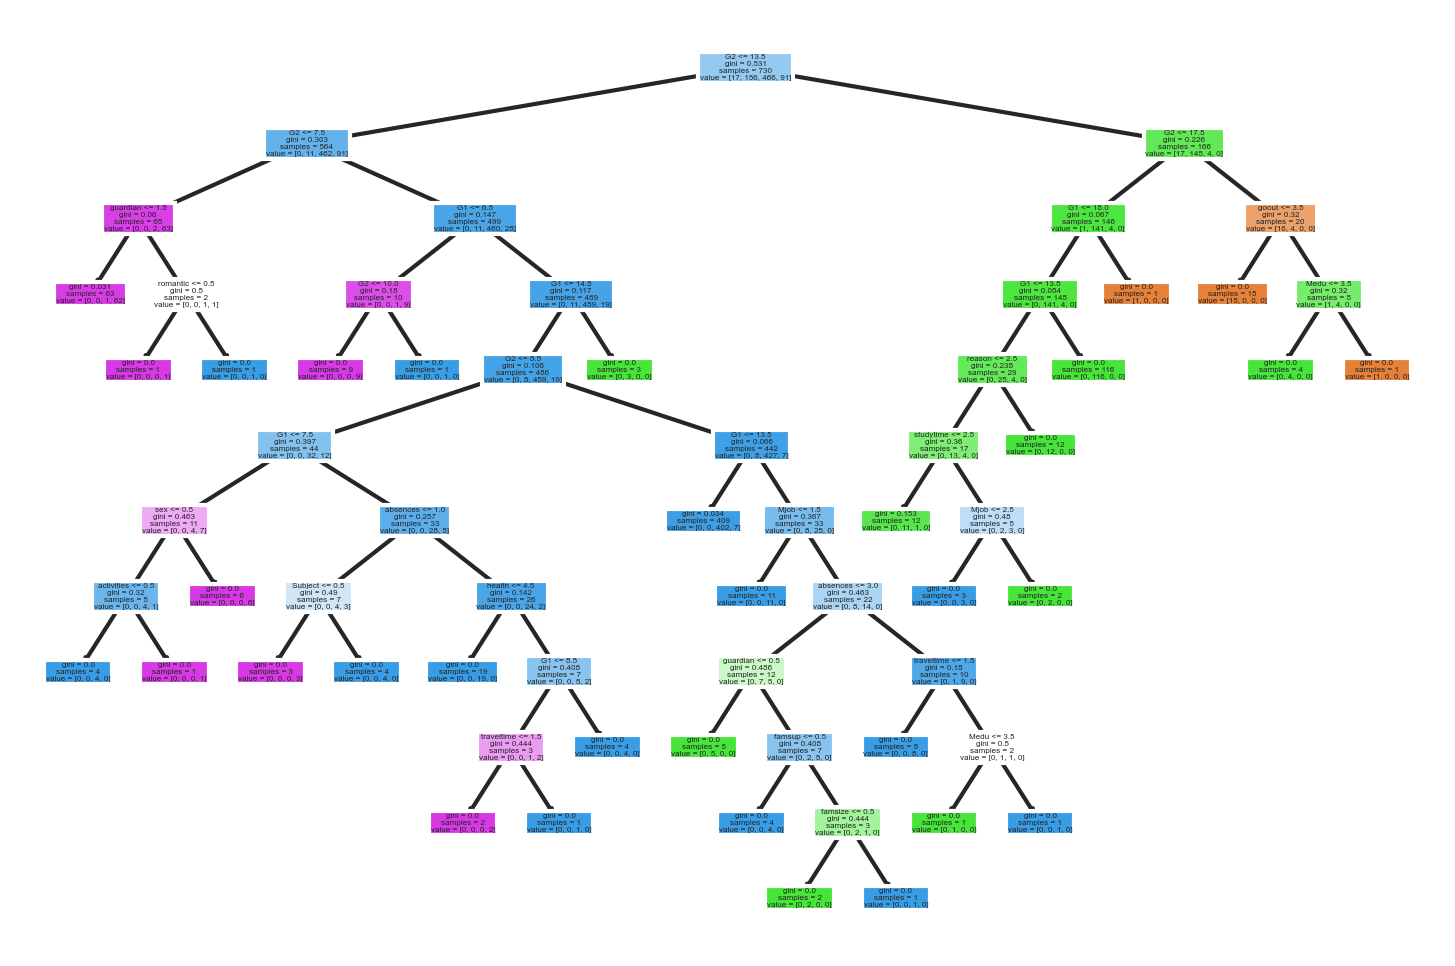

In [50]:
 def Decision_Tree(x):
    mat = data.corr()
    top_corr_features = mat.index[abs(mat["G3"])>0.12]
    if x==1:
        student_features = data.columns.tolist()
        student_features.remove('grades') 
        student_features.remove('GAvg')
        student_features.remove('G3')
        print(student_features)
    elif x==2:
        student_features = data.columns.tolist()
        student_features.remove('grades') 
        student_features.remove('GAvg')
        student_features.remove('G1')
        student_features.remove('G2')
        student_features.remove('G3')
        print(student_features)
    elif x==3:
        student_features = top_corr_features.tolist()
        student_features.remove('grades') 
        student_features.remove('GAvg') 
        # student_features.remove('G1') 
        # student_features.remove('G2') 
        student_features.remove('G3')
        print(student_features)
    else:
        student_features = top_corr_features.tolist()
        student_features.remove('grades') 
        student_features.remove('GAvg') 
        student_features.remove('G1') 
        student_features.remove('G2') 
        student_features.remove('G3')
        print(student_features)
        
    X = data[student_features].copy()
    print(X.columns)
    y=data[['grades']].copy()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
    print("Student:",data.shape,"\nX_train:",X_train.shape, "\nX_test:",X_test.shape, "\ny_train:",y_train.shape , '\ny_test:',y_test.shape )   
        

    grade_classifier = tree.DecisionTreeClassifier(max_leaf_nodes=len(X.columns), random_state=0)
    grade_classifier.fit(X_train, y_train)    
    
    predictions = grade_classifier.predict(X_test)
    
    print("Accuracy: ",(accuracy_score(y_test,predictions))*100)
    print("\nconfusion_matrix: \n",confusion_matrix(y_test,predictions))
    matrix = classification_report(y_test,predictions)
    print('Classification report : \n',matrix)
    
    fig, axes = plt.subplots(dpi=300)
    fig = tree.plot_tree(grade_classifier, feature_names=student_features, filled=True)
#     plt.savefig('Disicion Tree.png')
Decision_Tree(1)

## Without G1 and G2 

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'Subject']
Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'Subject'],
      dtype='object')
Student: (1044, 36) 
X_train: (730, 31) 
X_test: (314, 31) 
y_train: (730, 1) 
y_test: (314, 1)
Accuracy:  63.05732484076433

confusion_matrix: 
 [[  0   4   4   0]
 [  0  22  49   0]
 [  1  24 165   5]
 [  0   3  26  11]]
Classification report : 
               precision    recall  f1-score   suppor

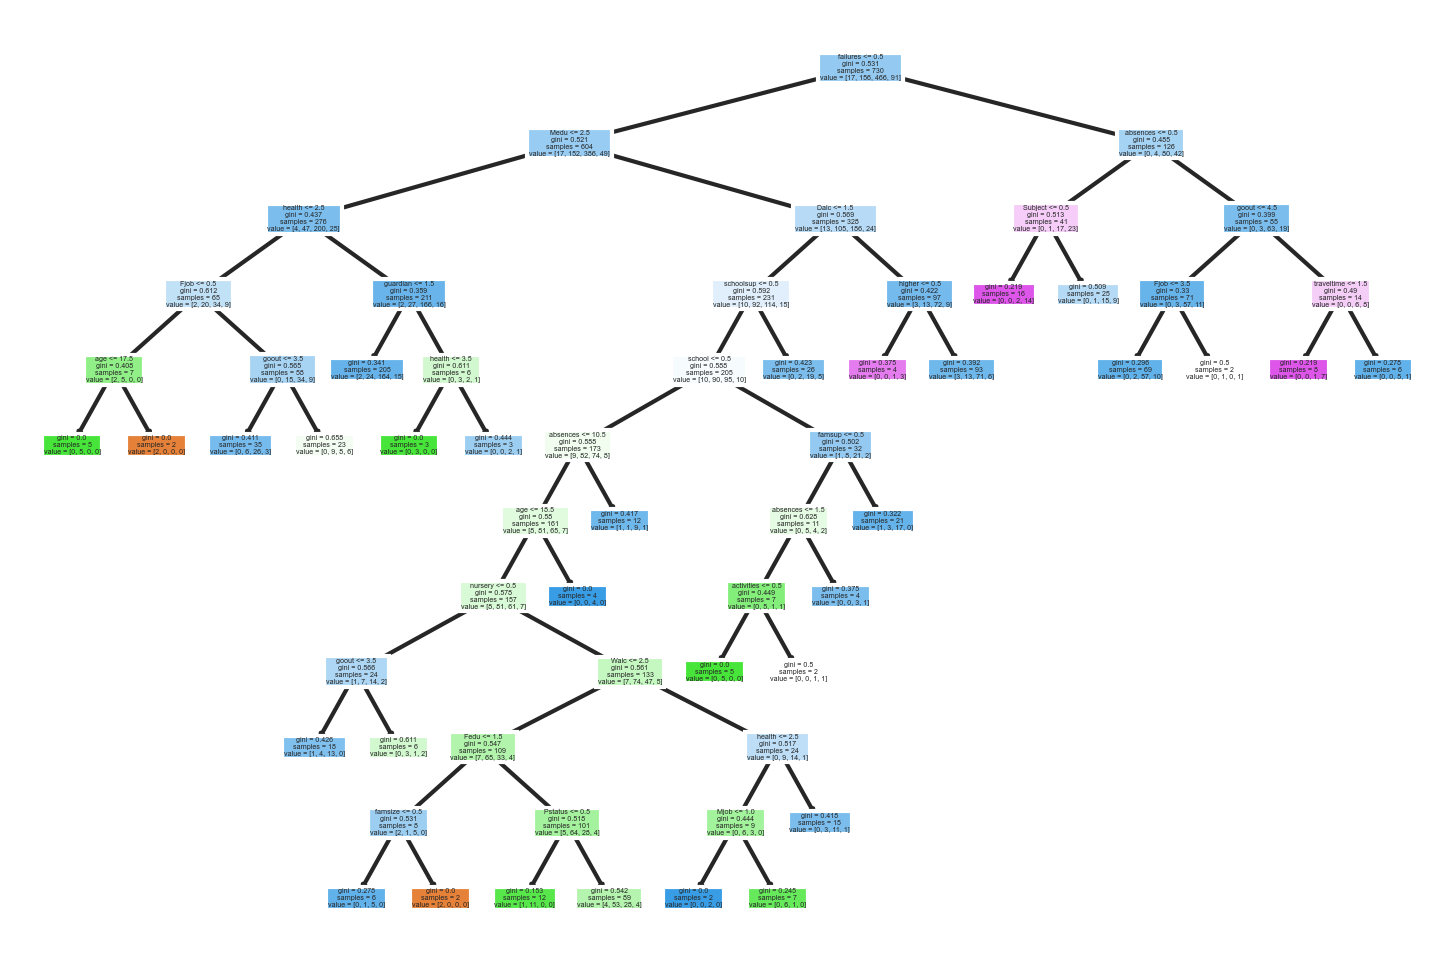

In [51]:
Decision_Tree(2)

## With highly related Features

['school', 'age', 'Medu', 'Fedu', 'studytime', 'failures', 'higher', 'Dalc', 'G1', 'G2', 'Subject']
Index(['school', 'age', 'Medu', 'Fedu', 'studytime', 'failures', 'higher',
       'Dalc', 'G1', 'G2', 'Subject'],
      dtype='object')
Student: (1044, 36) 
X_train: (730, 11) 
X_test: (314, 11) 
y_train: (730, 1) 
y_test: (314, 1)
Accuracy:  94.5859872611465

confusion_matrix: 
 [[  7   1   0   0]
 [  3  66   2   0]
 [  0   4 187   4]
 [  0   0   3  37]]
Classification report : 
               precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.93      0.93      0.93        71
           2       0.97      0.96      0.97       195
           3       0.90      0.93      0.91        40

    accuracy                           0.95       314
   macro avg       0.88      0.92      0.90       314
weighted avg       0.95      0.95      0.95       314



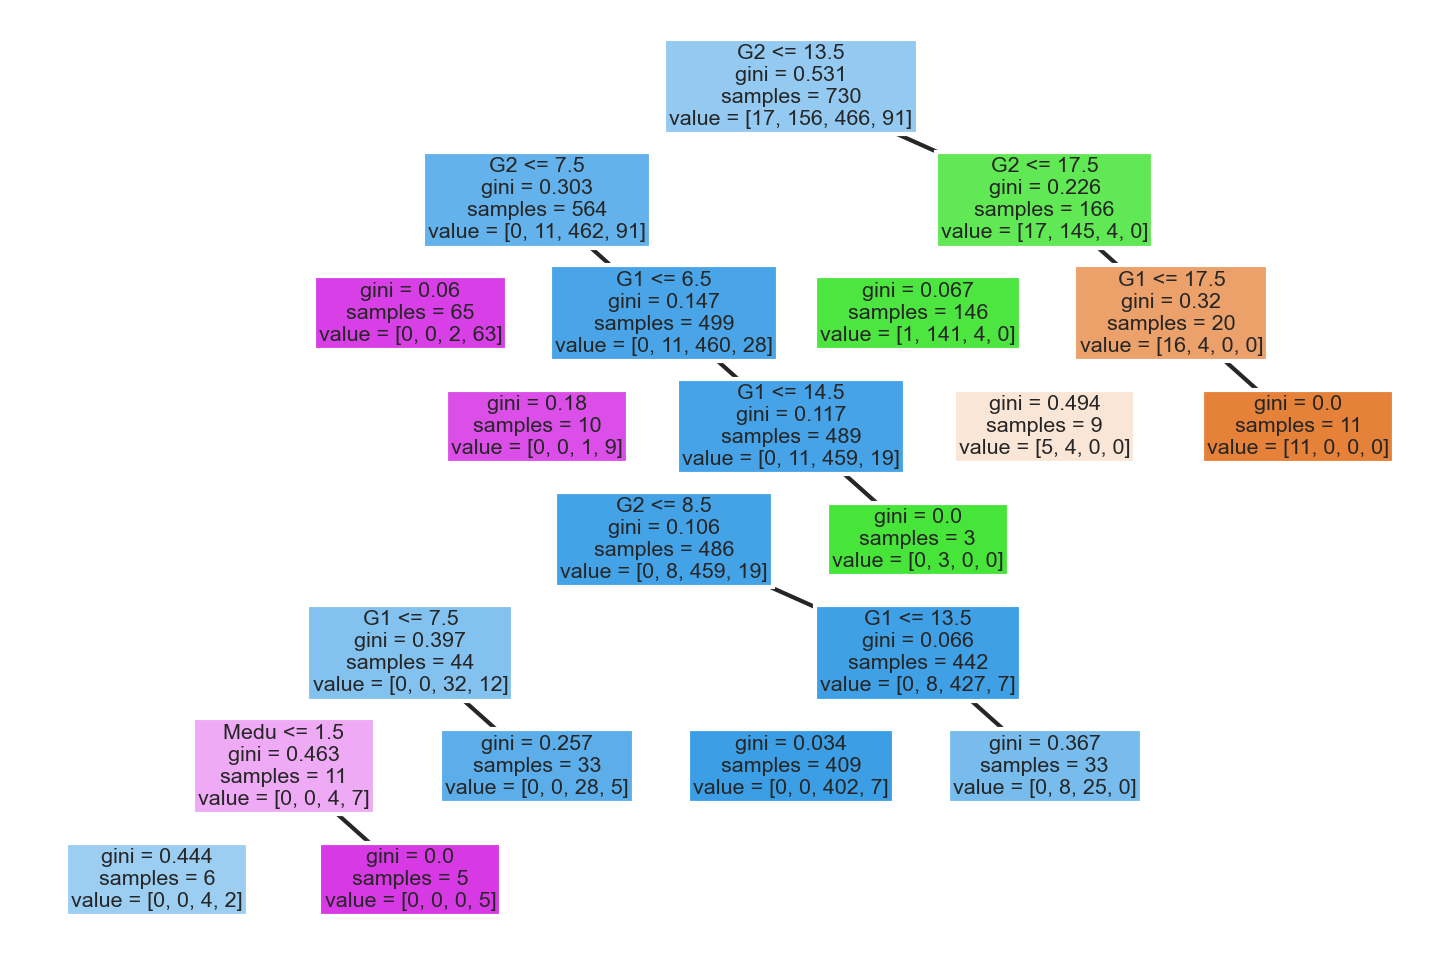

In [52]:
Decision_Tree(3)

## With Highy related feature Expect G1 & G2

['school', 'age', 'Medu', 'Fedu', 'studytime', 'failures', 'higher', 'Dalc', 'Subject']
Index(['school', 'age', 'Medu', 'Fedu', 'studytime', 'failures', 'higher',
       'Dalc', 'Subject'],
      dtype='object')
Student: (1044, 36) 
X_train: (730, 9) 
X_test: (314, 9) 
y_train: (730, 1) 
y_test: (314, 1)
Accuracy:  62.101910828025474

confusion_matrix: 
 [[  0   5   3   0]
 [  0  27  44   0]
 [  0  32 158   5]
 [  0   3  27  10]]
Classification report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.40      0.38      0.39        71
           2       0.68      0.81      0.74       195
           3       0.67      0.25      0.36        40

    accuracy                           0.62       314
   macro avg       0.44      0.36      0.37       314
weighted avg       0.60      0.62      0.59       314



c:\users\maulik virpariya\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\maulik virpariya\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\maulik virpariya\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

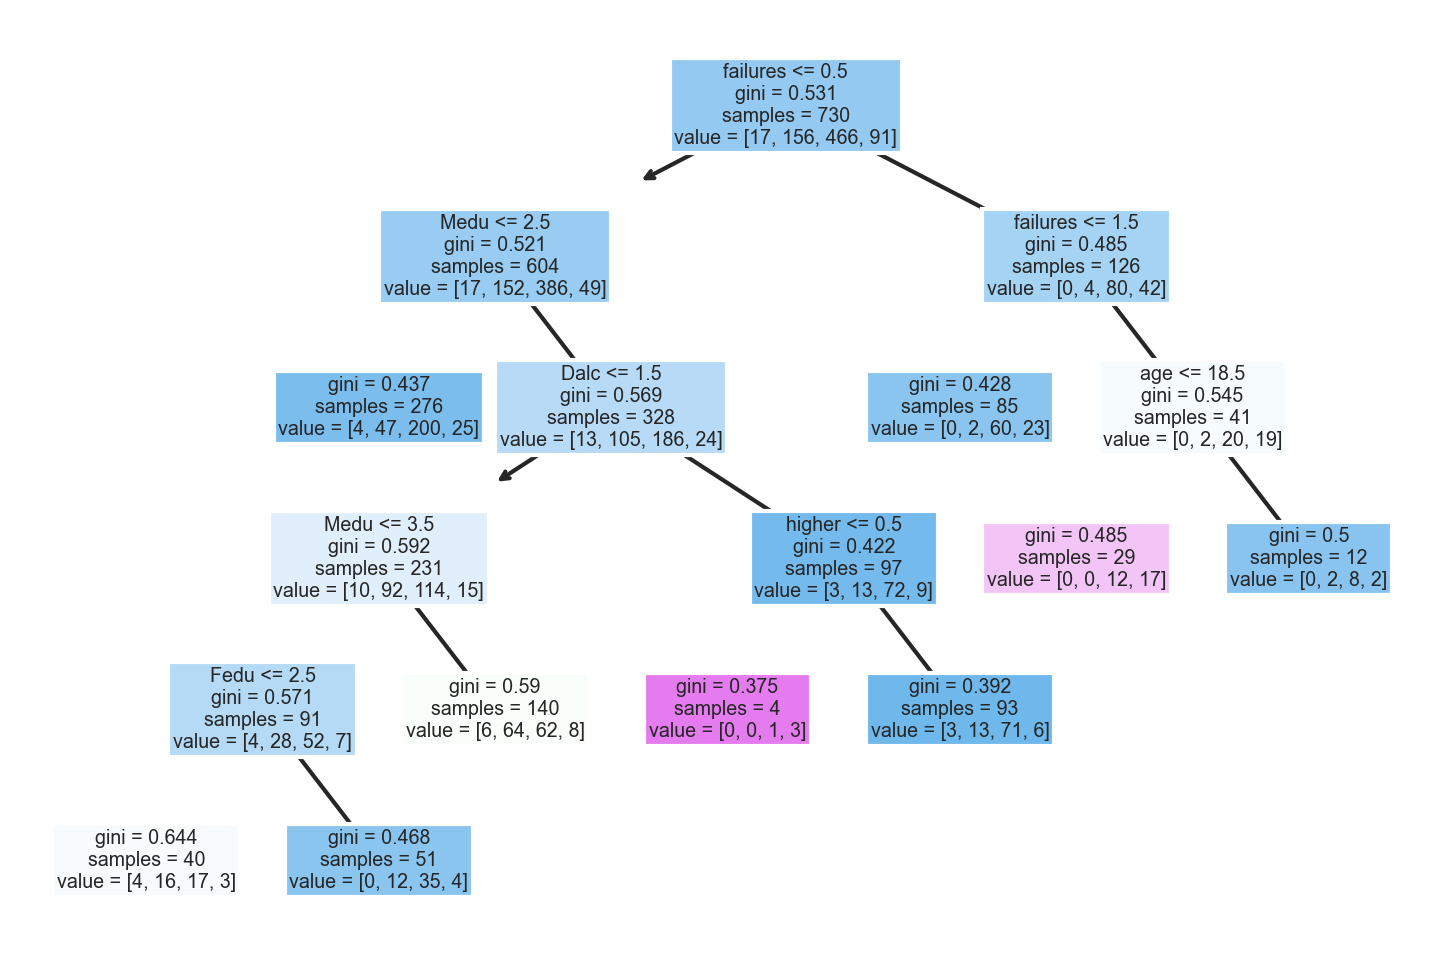

In [53]:
Decision_Tree(4)

# Best Features 

Index(['Medu', 'failures', 'schoolsup', 'absences', 'G1', 'G2'], dtype='object')
Student: (1044, 6) 
X_train: (835, 6) 
X_test: (209, 6) 
y_train: (835, 1) 
y_test: (209, 1)
Accuracy score 95.21531100478468 
 i value: 14 



[[  6   1   0   0]
 [  2  34   4   0]
 [  0   1 144   0]
 [  0   0   2  15]]
Classification report : 
               precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.94      0.85      0.89        40
           2       0.96      0.99      0.98       145
           3       1.00      0.88      0.94        17

    accuracy                           0.95       209
   macro avg       0.91      0.90      0.90       209
weighted avg       0.95      0.95      0.95       209



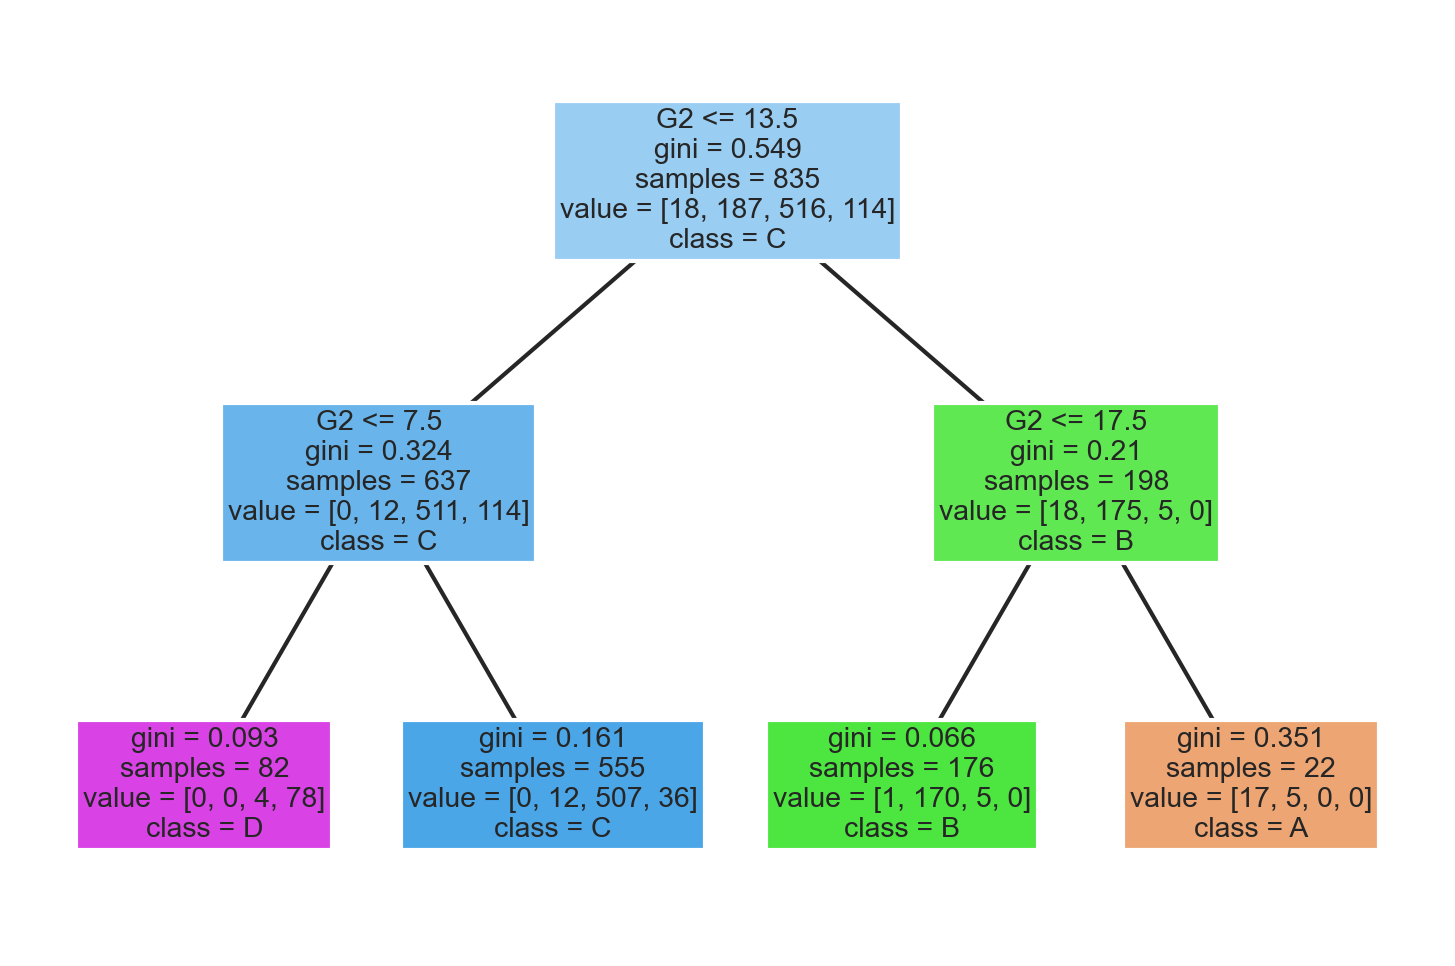

In [54]:
future=['Medu', 'failures', 'schoolsup', 'absences', 'G1', 'G2']
X = data[future].copy()
print(X.columns)
y=data[['grades']].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=29)
print("Student:",X.shape,"\nX_train:",X_train.shape, "\nX_test:",X_test.shape, "\ny_train:",y_train.shape , '\ny_test:',y_test.shape )   

grade_classifier = tree.DecisionTreeClassifier(max_leaf_nodes=4, random_state=0)
grade_classifier.fit(X_train, y_train)    
predictions = grade_classifier.predict(X_test)
accuracy=(accuracy_score(y_test,predictions))*100

print("Accuracy score",accuracy,f"\n i value: {i} \n\n\n")
print(confusion_matrix(y_test,predictions))
matrix = classification_report(y_test,predictions)
print('Classification report : \n',matrix)

fig, axes = plt.subplots(dpi=300)
fig = tree.plot_tree(grade_classifier, feature_names=future, class_names=['A','B',"C","D"],filled=True)
plt.savefig('Disicion Tree.png')

# SVM

In [55]:
X=data.drop("grades",axis=1)
X=X.drop("G3",axis=1)
X=X.drop("GAvg",axis=1)
y=data['grades']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=29)
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=29)
# print(y,Y)
X
# y

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Subject
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,0
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,0
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,0
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,0
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,0,0,1,2,3,3,2,...,5,4,2,1,2,5,4,10,11,1
645,1,0,18,1,1,1,3,1,4,3,...,4,3,4,1,1,1,4,15,15,1
646,1,0,18,1,0,1,1,1,2,2,...,1,1,1,1,1,5,6,11,12,1
647,1,1,17,1,1,1,3,1,3,3,...,2,4,5,3,4,2,6,10,10,1


## GRIDSEARCH

##### by this tuning technique we can to compute the optimum values of hyperparameters

In [56]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['poly', 'rbf', 'sigmoid','linear']}
   
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)       

grid.fit(X_train,y_train.values.ravel())                                               


print('\n\n',grid.best_params_)                                         
print(grid.best_estimator_)


grid_predictions= grid.predict(X_test)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.938 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.911 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.897 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.918 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.918 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.616 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.616 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.616 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.623 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.616 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.616 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoi

In [61]:
# print("\n",grid_predictions)
print("accuracy: ",metrics.accuracy_score(y_test,grid_predictions,normalize=True))    
print('\nClassification report : \n',classification_report(y_test,grid_predictions))
# print("confusion matrix: \n",confusion_matrix(y_test,pred))

df = pd.DataFrame(grid.cv_results_)
print("\n\n",df[['param_C','param_kernel','param_gamma','mean_test_score','rank_test_score']])


accuracy:  0.8980891719745223

Classification report : 
               precision    recall  f1-score   support

           0       0.30      0.33      0.32         9
           1       0.82      0.81      0.81        67
           2       0.95      0.96      0.95       210
           3       0.89      0.86      0.87        28

    accuracy                           0.90       314
   macro avg       0.74      0.74      0.74       314
weighted avg       0.90      0.90      0.90       314



    param_C param_kernel param_gamma  mean_test_score  rank_test_score
0      0.1         poly           1         0.916438               18
1      0.1          rbf           1         0.617808               74
2      0.1      sigmoid           1         0.617808               74
3      0.1       linear           1         0.917808                7
4      0.1         poly         0.1         0.916438               18
..     ...          ...         ...              ...              ...
95    1000     

## With Best hyperparameters

In [62]:
model=SVC(C=10, gamma=0.001)
model.fit(X_train,y_train.values.ravel())
predictions=model.predict(X_test)
print("accuracy: ",metrics.accuracy_score(y_test,predictions,normalize=True))    # Efficiency of the model
print("\n")
print(classification_report(y_test,predictions))

accuracy:  0.945859872611465


              precision    recall  f1-score   support

           0       0.80      0.44      0.57         9
           1       0.88      0.90      0.89        67
           2       0.96      0.99      0.97       210
           3       1.00      0.93      0.96        28

    accuracy                           0.95       314
   macro avg       0.91      0.81      0.85       314
weighted avg       0.94      0.95      0.94       314



# Thank you